<a href="https://colab.research.google.com/github/seo-jeong-bang/like_code/blob/main/%EC%84%9C%EC%9A%B8%EC%97%90%20%EC%A7%91%EC%9D%84%20%EC%82%B4%20%EC%88%98%20%EC%9E%88%EC%9D%84%EA%B9%8C%3F_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#코랩 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
plt.rc('font', family='NanumBarunGothic')

## 1. 데이터 불러오기

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/한국부동산원_공동주택 실거래가격지수_아파트_월별 지역별 매매_20220531.csv', encoding = 'cp949')

In [6]:
df.head()

,지역,Jan-06,Feb-06,Mar-06,Apr-06,May-06,Jun-06,Jul-06,Aug-06,Sep-06,...,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22,Apr-22,May-22
0,전국,62.846,63.482,64.133,64.705,65.170,65.721,66.015,66.955,68.052,...,137.750,140.362,141.855,141.399,140.065,139.416,139.103,139.586,140.461,139.1
1,수도권,66.638,67.736,68.862,69.824,70.649,71.084,71.627,72.771,74.303,...,162.935,166.658,168.219,167.466,165.195,163.820,162.986,163.831,165.031,162.9
2,지방,59.695,59.710,59.688,59.679,59.592,60.374,60.338,60.985,61.296,...,116.761,118.477,119.961,119.788,119.261,119.239,119.385,119.601,120.240,119.6
3,6대광역시,57.592,57.567,57.532,57.597,57.611,58.014,58.094,58.641,59.152,...,130.989,132.974,134.704,134.177,132.691,132.293,132.504,132.351,132.741,131.7
4,5대광역시,56.322,56.177,55.987,55.850,55.683,56.042,56.073,56.504,56.949,...,127.672,129.120,130.690,130.003,128.913,128.572,128.548,128.465,128.908,128.0


In [7]:
df.shape

(28, 198)

## 2. 전처리

- 데이터프레임의 행과 열을 전환시켜서 날짜를 인덱스로 지정
- 날짜 수정 : 숫자로 변환
- 숫자 스케일링 : 100을 1로 기준삼아서 스케일


In [8]:
# 행 열 전환

df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
지역,전국,수도권,지방,6대광역시,5대광역시,8개도,서울,서울 도심권,서울 동북권,서울 서북권,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
Jan-06,62.846,66.638,59.695,57.592,56.322,62.947,61.037,58.77,59.075,56.506,...,73.488,71.133,60.817,66.151,77.061,58.088,50.946,66.892,63.584,39.117
Feb-06,63.482,67.736,59.71,57.567,56.177,63.111,62.161,57.747,59.482,56.527,...,76.122,72.328,61.159,67.249,77.876,58.402,50.55,66.507,63.437,38.05
Mar-06,64.133,68.862,59.688,57.532,55.987,63.26,63.694,60.035,59.779,57.243,...,78.756,73.245,59.889,67.687,78.383,58.827,50.868,66.629,63.889,36.32
Apr-06,64.705,69.824,59.679,57.597,55.85,63.384,64.676,59.398,59.843,57.589,...,75.04,74.278,60.463,68.692,78.265,59.023,51.158,66.438,63.495,36.406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jan-22,139.416,163.82,119.239,132.293,128.572,110.362,175.615,175.134,184.697,169.415,...,153.033,161.354,113.558,113.66,116.006,116.064,116.886,103.208,102.508,110.71
Feb-22,139.103,162.986,119.385,132.504,128.548,110.689,173.898,175.125,179.53,169.925,...,155.316,160.533,114.023,114.883,115.394,116.942,116.026,103.97,102.826,110.828
Mar-22,139.586,163.831,119.601,132.351,128.465,111.262,174.861,175.538,183.413,170.554,...,153.278,161.662,115.912,114.73,115.869,117.959,116.316,103.369,103.669,112.253
Apr-22,140.461,165.031,120.24,132.741,128.908,112.164,177.146,174.976,186.175,172.089,...,150.87,162.505,117.145,115.392,116.316,120.012,116.906,104.364,104.034,114.674


In [9]:
# 첫번째 행을 컬럼으로 지정

df_ = df.rename(columns=df.iloc[0])
df_

,전국,수도권,지방,6대광역시,5대광역시,8개도,서울,서울 도심권,서울 동북권,서울 서북권,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
지역,전국,수도권,지방,6대광역시,5대광역시,8개도,서울,서울 도심권,서울 동북권,서울 서북권,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
Jan-06,62.846,66.638,59.695,57.592,56.322,62.947,61.037,58.77,59.075,56.506,...,73.488,71.133,60.817,66.151,77.061,58.088,50.946,66.892,63.584,39.117
Feb-06,63.482,67.736,59.71,57.567,56.177,63.111,62.161,57.747,59.482,56.527,...,76.122,72.328,61.159,67.249,77.876,58.402,50.55,66.507,63.437,38.05
Mar-06,64.133,68.862,59.688,57.532,55.987,63.26,63.694,60.035,59.779,57.243,...,78.756,73.245,59.889,67.687,78.383,58.827,50.868,66.629,63.889,36.32
Apr-06,64.705,69.824,59.679,57.597,55.85,63.384,64.676,59.398,59.843,57.589,...,75.04,74.278,60.463,68.692,78.265,59.023,51.158,66.438,63.495,36.406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jan-22,139.416,163.82,119.239,132.293,128.572,110.362,175.615,175.134,184.697,169.415,...,153.033,161.354,113.558,113.66,116.006,116.064,116.886,103.208,102.508,110.71
Feb-22,139.103,162.986,119.385,132.504,128.548,110.689,173.898,175.125,179.53,169.925,...,155.316,160.533,114.023,114.883,115.394,116.942,116.026,103.97,102.826,110.828
Mar-22,139.586,163.831,119.601,132.351,128.465,111.262,174.861,175.538,183.413,170.554,...,153.278,161.662,115.912,114.73,115.869,117.959,116.316,103.369,103.669,112.253
Apr-22,140.461,165.031,120.24,132.741,128.908,112.164,177.146,174.976,186.175,172.089,...,150.87,162.505,117.145,115.392,116.316,120.012,116.906,104.364,104.034,114.674


In [10]:
# 첫번째 행 삭제

df = df_.drop(df_.index[0])
df

,전국,수도권,지방,6대광역시,5대광역시,8개도,서울,서울 도심권,서울 동북권,서울 서북권,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
Jan-06,62.846,66.638,59.695,57.592,56.322,62.947,61.037,58.77,59.075,56.506,...,73.488,71.133,60.817,66.151,77.061,58.088,50.946,66.892,63.584,39.117
Feb-06,63.482,67.736,59.71,57.567,56.177,63.111,62.161,57.747,59.482,56.527,...,76.122,72.328,61.159,67.249,77.876,58.402,50.55,66.507,63.437,38.05
Mar-06,64.133,68.862,59.688,57.532,55.987,63.26,63.694,60.035,59.779,57.243,...,78.756,73.245,59.889,67.687,78.383,58.827,50.868,66.629,63.889,36.32
Apr-06,64.705,69.824,59.679,57.597,55.85,63.384,64.676,59.398,59.843,57.589,...,75.04,74.278,60.463,68.692,78.265,59.023,51.158,66.438,63.495,36.406
May-06,65.17,70.649,59.592,57.611,55.683,63.377,65.101,61.21,59.984,58.322,...,76.811,75.483,61.296,68.159,76.115,59.29,52.56,66.459,63.461,37.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jan-22,139.416,163.82,119.239,132.293,128.572,110.362,175.615,175.134,184.697,169.415,...,153.033,161.354,113.558,113.66,116.006,116.064,116.886,103.208,102.508,110.71
Feb-22,139.103,162.986,119.385,132.504,128.548,110.689,173.898,175.125,179.53,169.925,...,155.316,160.533,114.023,114.883,115.394,116.942,116.026,103.97,102.826,110.828
Mar-22,139.586,163.831,119.601,132.351,128.465,111.262,174.861,175.538,183.413,170.554,...,153.278,161.662,115.912,114.73,115.869,117.959,116.316,103.369,103.669,112.253
Apr-22,140.461,165.031,120.24,132.741,128.908,112.164,177.146,174.976,186.175,172.089,...,150.87,162.505,117.145,115.392,116.316,120.012,116.906,104.364,104.034,114.674


In [11]:
df.index

Index(['Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06', 'Jul-06',
       'Aug-06', 'Sep-06', 'Oct-06',
       ...
       'Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22',
       'Mar-22', 'Apr-22', 'May-22'],
      dtype='object', length=197)

In [12]:
# 인덱스 날짜를 datetime 으로 변환

df.index = pd.to_datetime(df.index, format ='%b-%y', errors='coerce').strftime("%Y-%m")
df

,전국,수도권,지방,6대광역시,5대광역시,8개도,서울,서울 도심권,서울 동북권,서울 서북권,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2006-01,62.846,66.638,59.695,57.592,56.322,62.947,61.037,58.77,59.075,56.506,...,73.488,71.133,60.817,66.151,77.061,58.088,50.946,66.892,63.584,39.117
2006-02,63.482,67.736,59.71,57.567,56.177,63.111,62.161,57.747,59.482,56.527,...,76.122,72.328,61.159,67.249,77.876,58.402,50.55,66.507,63.437,38.05
2006-03,64.133,68.862,59.688,57.532,55.987,63.26,63.694,60.035,59.779,57.243,...,78.756,73.245,59.889,67.687,78.383,58.827,50.868,66.629,63.889,36.32
2006-04,64.705,69.824,59.679,57.597,55.85,63.384,64.676,59.398,59.843,57.589,...,75.04,74.278,60.463,68.692,78.265,59.023,51.158,66.438,63.495,36.406
2006-05,65.17,70.649,59.592,57.611,55.683,63.377,65.101,61.21,59.984,58.322,...,76.811,75.483,61.296,68.159,76.115,59.29,52.56,66.459,63.461,37.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01,139.416,163.82,119.239,132.293,128.572,110.362,175.615,175.134,184.697,169.415,...,153.033,161.354,113.558,113.66,116.006,116.064,116.886,103.208,102.508,110.71
2022-02,139.103,162.986,119.385,132.504,128.548,110.689,173.898,175.125,179.53,169.925,...,155.316,160.533,114.023,114.883,115.394,116.942,116.026,103.97,102.826,110.828
2022-03,139.586,163.831,119.601,132.351,128.465,111.262,174.861,175.538,183.413,170.554,...,153.278,161.662,115.912,114.73,115.869,117.959,116.316,103.369,103.669,112.253
2022-04,140.461,165.031,120.24,132.741,128.908,112.164,177.146,174.976,186.175,172.089,...,150.87,162.505,117.145,115.392,116.316,120.012,116.906,104.364,104.034,114.674


In [13]:
df.index

Index(['2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06',
       '2006-07', '2006-08', '2006-09', '2006-10',
       ...
       '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03', '2022-04', '2022-05'],
      dtype='object', length=197)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 2006-01 to 2022-05
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전국      197 non-null    object
 1   수도권     197 non-null    object
 2   지방      197 non-null    object
 3   6대광역시   197 non-null    object
 4   5대광역시   197 non-null    object
 5   8개도     197 non-null    object
 6   서울      197 non-null    object
 7   서울 도심권  197 non-null    object
 8   서울 동북권  197 non-null    object
 9   서울 서북권  197 non-null    object
 10  서울 서남권  197 non-null    object
 11  서울 동남권  197 non-null    object
 12  부산      197 non-null    object
 13  대구      197 non-null    object
 14  인천      197 non-null    object
 15  광주      197 non-null    object
 16  대전      197 non-null    object
 17  울산      197 non-null    object
 18  세종      197 non-null    object
 19  경기      197 non-null    object
 20  강원      197 non-null    object
 21  충북      197 non-null    object
 22  충남      197 non-null 

In [15]:
df=df.astype(float)

### 스케일링 

문재인 정부는 2017년 11월 집값을 100으로 놓고 지수화를 하였다. 
2017년 11월 데이터를 1로 두고 조금 더 보기 좋게 수치화 해주었다.

In [16]:
df_1=df*0.01

In [17]:
df_1.loc[['2017-11']]

,전국,수도권,지방,6대광역시,5대광역시,8개도,서울,서울 도심권,서울 동북권,서울 서북권,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2017-11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 시각화

1.  서울 집값이 어느 지역에서 가장 변동이 심했는지? (5개 지역)
2.  집 값 변동이 가장 큰 지역 찾기 : 집 사지말라고 경고하자
3.  (세종시 같은) 이슈가 있는 지역의 이슈를 기준으로 얼마나 집 값이 변동되었는지 확인

4.  시각화 : 꺾은선 그래프
5.  2번에서 찾은 지역으로 히트맵 
6.  현재 기준 가장 비싼 지역 히트맵 


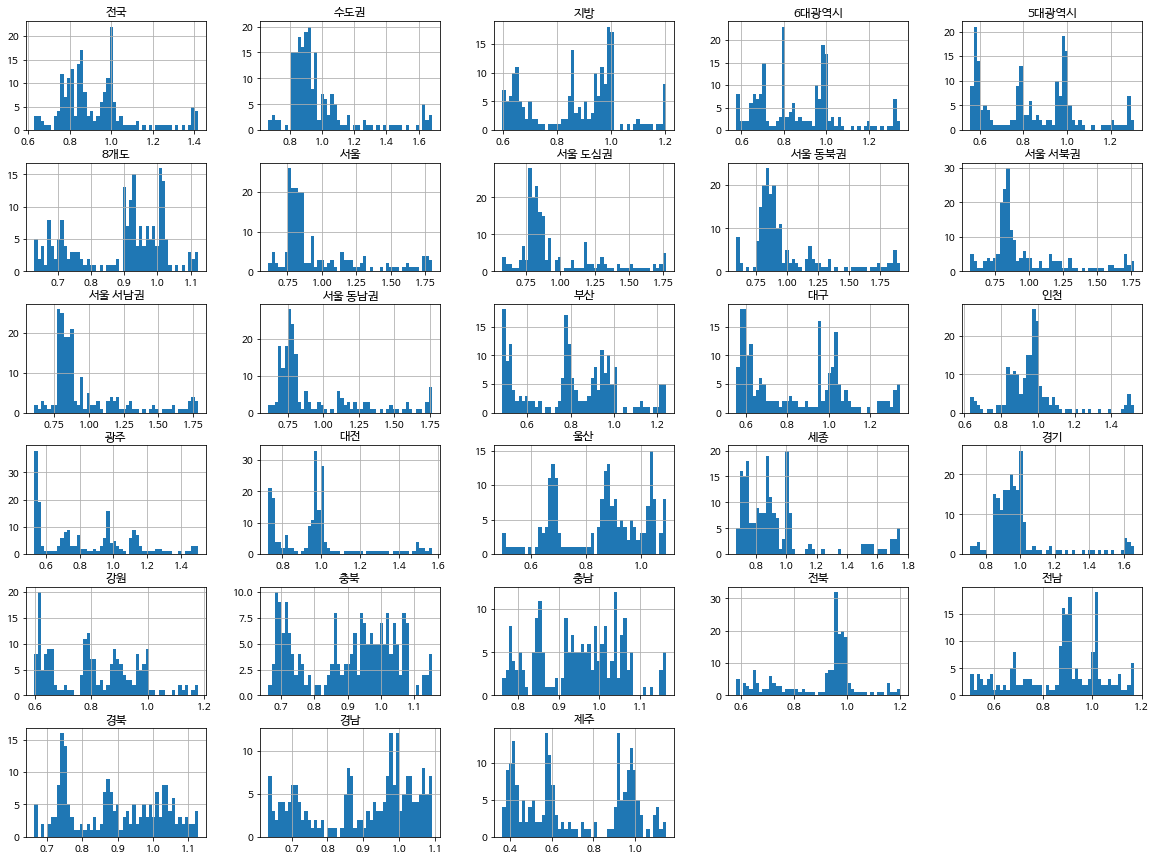

In [45]:
df_1.hist(bins=50,figsize=(20,15))
plt.show()

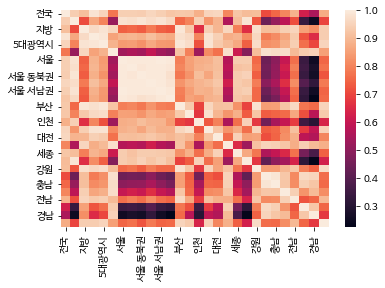

In [19]:
sns.heatmap(df_1.corr())
plt.show()

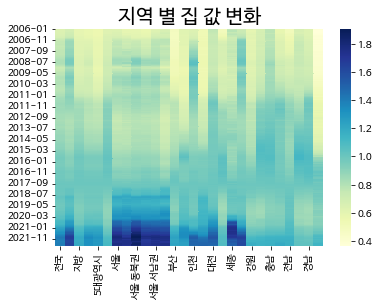

In [36]:
df_2 = sns.heatmap(df_1,cmap='YlGnBu')
plt.title ('지역 별 집 값 변화', fontsize =20)
plt.show()


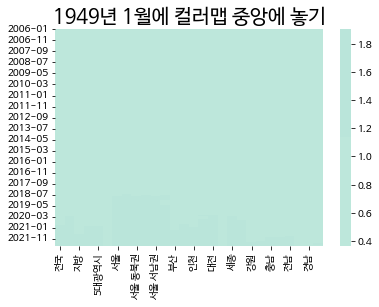

In [37]:
sns.heatmap(df_1, center=df.loc['2017-11','부산'] )
plt.title ('1949년 1월에 컬러맵 중앙에 놓기', fontsize =20)
plt.show()
